In [70]:
# Trying EDA on merged dataset containing cyclones and WBI

# Dev Bharti 17-Apr

In [59]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings   
import scipy.stats as stats   
warnings.simplefilter(action='ignore', category=FutureWarning) 
pd.set_option('display.max_columns', None)

In [60]:
df_original_data = pd.read_csv('/home/dev/course-v3/nbs/dl1/omdena/model/data/OUTPUT_WBI_cyclones_merged.csv', sep = ';', low_memory=False)

In [61]:
df_original_data.describe()

,ID,Year,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Total Affected
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1069.000000,1074.000000,1074.000000,1074.000000,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,7.390000e+02,1074.000000,896.000000,1073.000000,1064.000000,1070.000000,1030.000000,1065.000000,1.074000e+03,1070.000000,1063.000000,1074.000000,1064.000000,1074.000000,1.074000e+03
mean,547.449721,1999.151769,9.966480,2.242086,7.724395,0.232775,979.500737,12.484935,216.232129,90.033297,1.649803e+07,8.197202e+11,4.932025e+06,2.705320e+11,8.986011e+05,4.191453e+10,1.268990e+06,66.630182,4305.315968,0.188690,3441.941681,94.033296,4.556110,9734.239904,2.157766e+07,70.391938,41.629654,307.731435,3.221199,48.075277,6.144233e+05
std,314.179426,14.757065,7.402475,3.693910,7.714526,1.703515,19.672200,7.071471,98.801592,31.464558,1.969910e+07,1.657971e+12,8.511631e+06,6.829740e+11,2.845690e+06,1.684761e+11,7.203996e+06,24.852156,8471.729906,0.351739,1724.138826,30.813846,4.240255,14880.229338,2.645726e+07,7.283054,47.406186,980.711966,1.825383,22.069338,2.045526e+06
min,1.000000,1949.000000,0.000000,0.000000,-1.000000,-5.000000,903.125000,1.100000,0.000000,30.000000,1.065000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,9.327572,0.000000,0.000425,393.300000,17.390000,-16.995075,168.663976,-7.000000e+04,41.762000,0.000000,1.786314,0.538881,0.000000,2.000000e+00
25%,277.250000,1990.000000,3.000000,0.000000,1.000000,-1.000000,967.684210,7.909341,147.227273,62.850000,1.910687e+06,1.537348e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.492350e+04,51.106795,95.599998,0.059615,1999.450000,73.475000,2.204688,1440.590250,1.030000e+06,66.594860,0.004801,48.669463,1.840000,24.704000,3.123500e+03
50%,545.500000,2003.000000,9.000000,0.000000,5.000000,0.000000,983.892857,11.000000,263.750000,89.100000,8.281419e+06,1.040000e+11,7.935150e+05,8.856707e+09,0.000000e+00,0.000000e+00,7.800000e+04,71.955007,426.915730,0.092525,3228.900000,98.380000,4.495078,2635.853796,1.278000e+07,70.802000,24.180459,143.871390,2.757732,53.716000,3.017000e+04
75%,820.750000,2011.000000,18.000000,3.000000,15.000000,1.000000,994.777778,15.000000,289.392105,114.400000,2.315036e+07,5.400000e+11,7.129787e+06,1.090000e+11,2.916590e+05,4.964175e+09,4.187000e+05,87.984603,3900.080000,0.191018,4871.100000,114.202500,6.884055,8607.657082,3.201750e+07,75.065000,81.791197,292.687045,4.191404,65.588500,2.707850e+05
max,1091.000000,2019.000000,23.000000,12.000000,23.000000,5.000000,1013.000000,53.000000,358.000000,171.800000,1.186283e+08,9.760000e+12,6.057264e+07,4.630000e+12,3.672847e+07,1.570000e+12,1.250000e+08,100.000000,42985.295220,3.069373,8900.000000,223.020000,19.300000,86150.462210,1.837500e+08,84.680488,328.790446,20479.769990,14.010000,92.421000,2.962200e+07


In [62]:
df_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID                                                   1074 non-null   int64  
 1   NAME                                                 1073 non-null   object 
 2   ISO                                                  1074 non-null   object 
 3   Year                                                 1074 non-null   int64  
 4   COORDS                                               1074 non-null   object 
 5   BASIN                                                1074 non-null   object 
 6   SUBBASIN                                             1074 non-null   object 
 7   NATURE                                               1074 non-null   object 
 8   ISO_TIME                                             1074 non-null  

In [63]:
df_original_data.head()

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected
0,1,DELLA,JPN,1949,"[[31.99, 130.68], [33.52, 130.97], [41.0, 140....",WP,WP,ET,"['1949-06-20 15:00:00', '1949-06-20 18:00:00',...",12,0,12,-1,986.375000,21.50,40.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,194046
1,2,JANE,JPN,1950,"[[34.94, 135.48], [36.1, 136.09], [37.27, 136....",WP,WP,TS,"['1950-09-03 03:00:00', '1950-09-03 06:00:00',...",21,0,21,0,973.500000,27.00,31.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,642117
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.50,284.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.3,69.93,NaN,3796.219401,0.0,64.770000,NaN,152.453647,2.578304,66.231,Low,20200
3,4,AMY,PHL,1951,"[[10.73, 124.8], [10.53, 123.17], [10.68, 119....",WP,WP,TS,"['1951-12-09 12:00:00', '1951-12-09 21:00:00',...",12,0,12,2,961.333333,9.00,270.666667,119.200,20464826.0,1.880000e+11,12675908.0,1.130000e+11,5618193.0,4.897333e+10,NaN,10.175534,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,60000
4,5,EMMA,PHL,1952,"[[10.47, 123.87], [10.65, 123.24], [10.83, 122...",WP,WP,TS,"['1952-07-02 12:00:00', '1952-07-02 15:00:00',...",9,8,1,0,983.500000,12.25,288.500000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,103


In [64]:
# Drop a few columns that we know are not filled up / not agreed to be useful
df_modified_1 = df_original_data.drop(columns=['NATURE', 
                               'DAY_HRS', 
                               'NIGHT_HRS',
                               '34kn_pop',
                               '34kn_assets',
                               '64kn_pop',
                               '64kn_assets',
                               '96kn_pop',
                               '96kn_assets'
                              ])

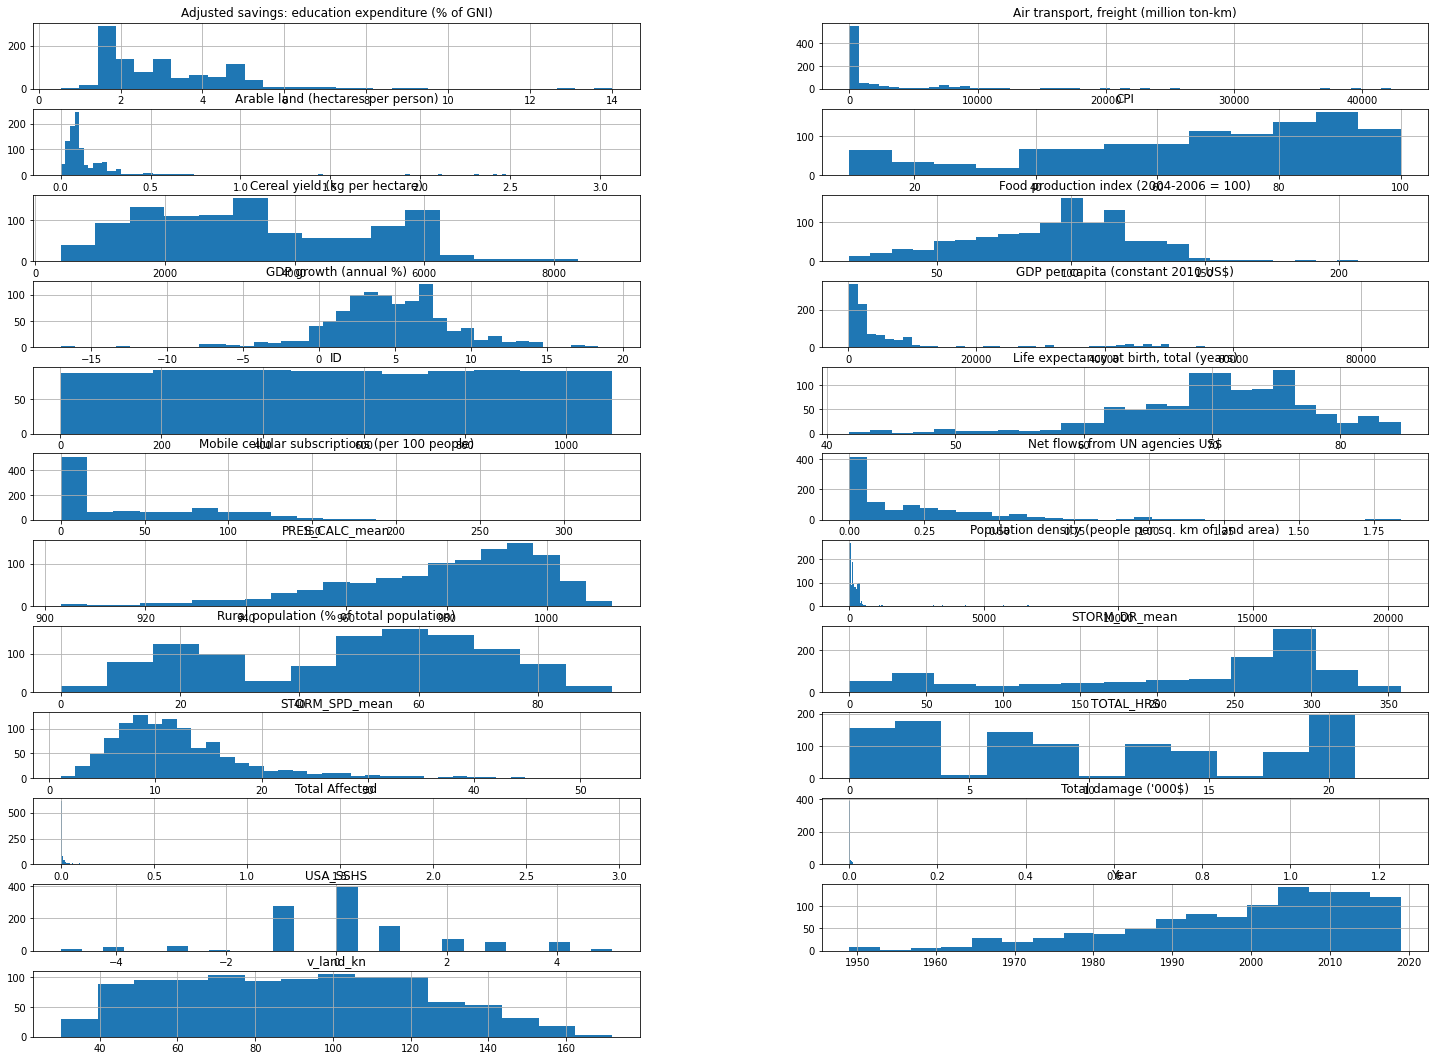

In [65]:
# easy way to plot all numeric columns
df_modified_1.hist(figsize = (25, 25), layout=(16, 2), bins = 'auto')
# plt.tight_layout()
# plt.savefig('plots/firsthist.png')
plt.show()

In [66]:
# Some are not bell shaped and skewed
# 'Air transport', 'GDP per Capita', Mobile' values are mostly near 0

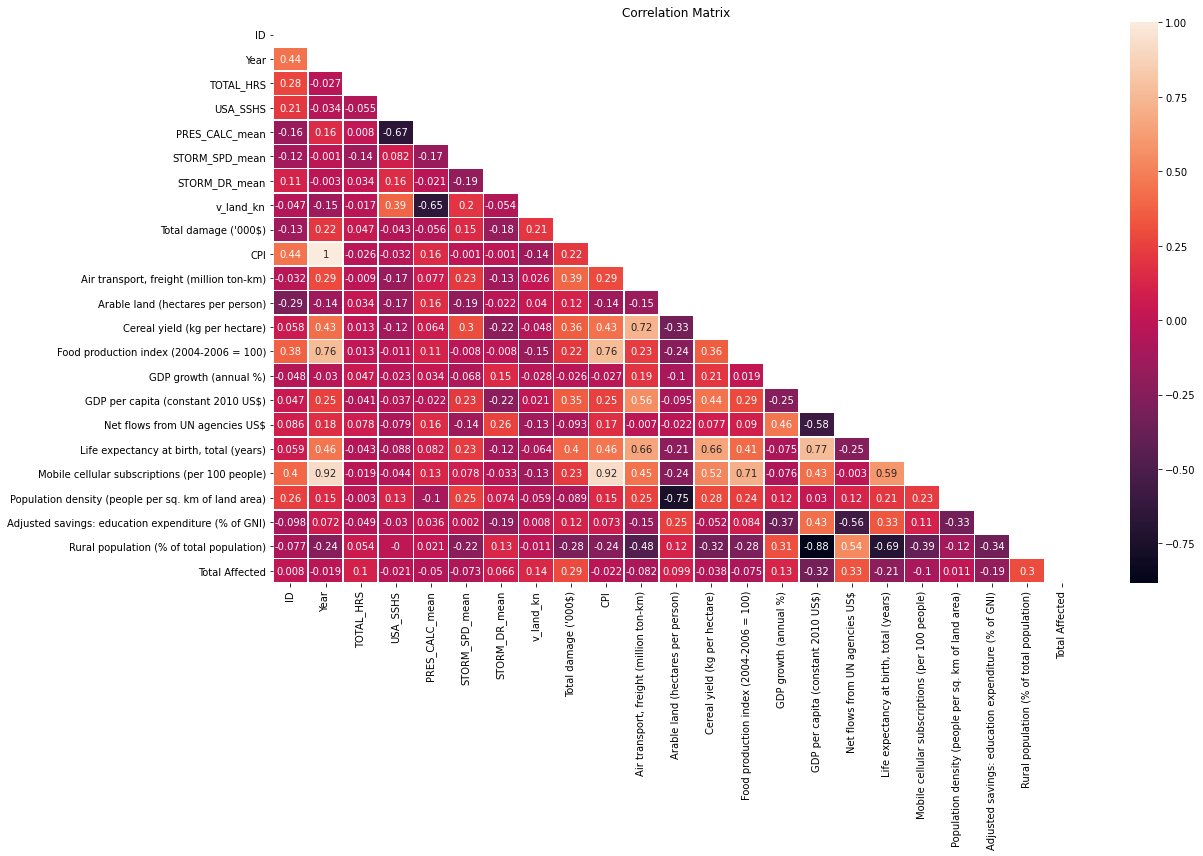

In [67]:
plt.figure(figsize = (18, 12))
mask = np.triu(np.ones_like(df_modified_1.corr(), dtype=bool))
sns.heatmap(round(df_modified_1.corr(method = 'spearman'), 3), mask=mask, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
# plt.savefig('plots/cormat.png')
plt.show()

In [68]:
# Not many features co-relate with Total Affected

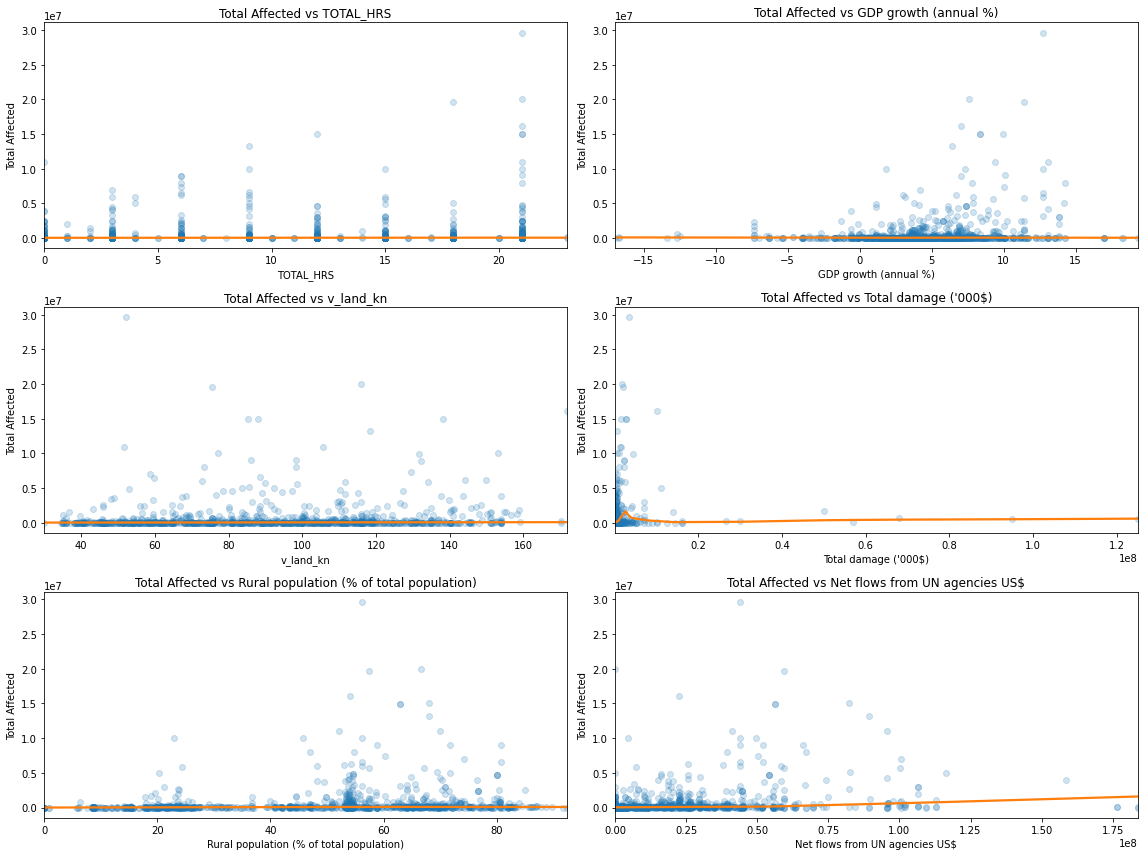

In [69]:
topcorr = df_modified_1.corr(method = 'spearman')['Total Affected'].sort_values()[:-1]
topcorr = topcorr.tail(6)
fig, ax = plt.subplots(3,2, figsize = (16, 12))
ax = ax.ravel()
j = 0
for i in topcorr.index:
    sns.regplot(i, 'Total Affected', ax = ax[j],lowess=True, data = df_modified_1, color = 'C0', line_kws={"color": "C1"},
               scatter_kws={"alpha": 0.2})
    ax[j].set_title("Total Affected vs {}".format(i))
    j += 1
plt.tight_layout()
# plt.savefig('plots/Scatterplots.png')
plt.show()